[[ 48   5   5   6   2  16   5   0]
 [  1  92   7  12   1  13   2   0]
 [  0   1  60   4   2  11   0   0]
 [  1   6   9 104   3   8   1   0]
 [  1   8   6   5  91   3   0   0]
 [  4   8   3   7   4 268   0   0]
 [  2   6   1   1   0   1  87   0]
 [  2   1   0   0   0   0   0  59]]


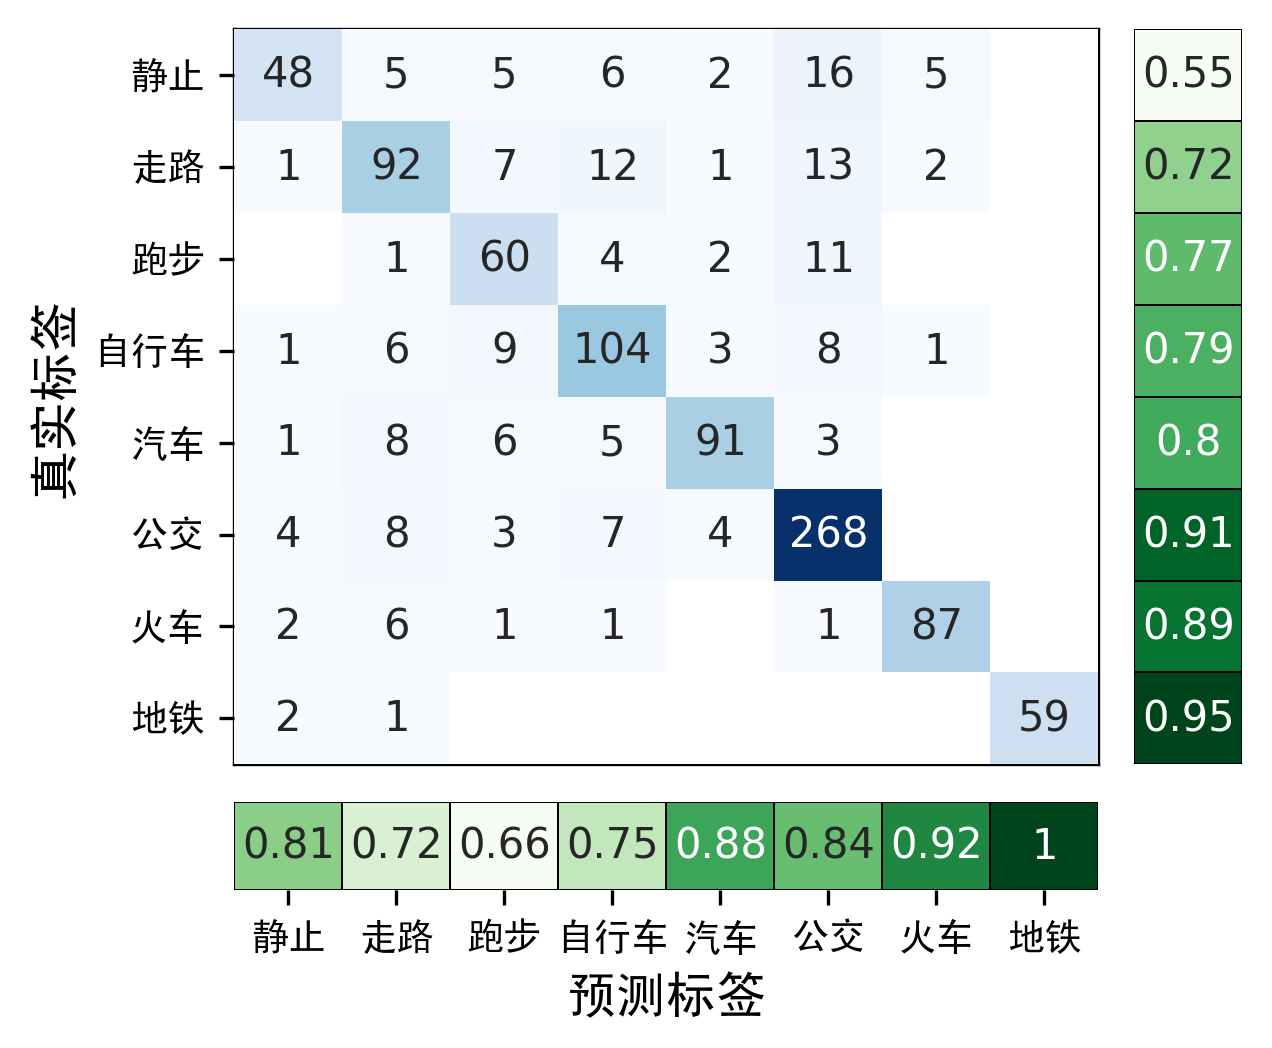

In [1]:
from tabulate import tabulate
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

myfont = fm.FontProperties(fname=r'../input/simhei/SimHei.ttf') # 设置字体
label=['静止','走路','跑步','自行车','汽车','公交','火车','地铁']

cm = [
    [48,5,5,6,2,16,5,0],
    [1,92,7,12,1,13,2,0],
    [0,1,60,4,2,11,0,0],
    [1,6,9,104,3,8,1,0],
    [1,8,6,5,91,3,0,0],
    [4,8,3,7,4,268,0,0],
    [2,6,1,1,0,1,87,0],
    [2,1,0,0,0,0,0,59]
]
cm = np.array(cm)
print(cm)


# 计算召回率和精确度
b1,b2 = [],[]
for i in range(len(cm)):
    tm1 = np.round((cm[i,i]/sum(cm[i,:])),2)
    tm2 = np.round(cm[i,i]/sum(cm[:,i]),2)
    b1.append(tm1)
    b2.append(tm2)

b1 = np.reshape(b1,(8,1))
b1 = pd.DataFrame(b1)
b1.columns=['正确']

b2 = np.reshape(b2,(1,8))
b2 = pd.DataFrame(b2)
b2.columns=label

cm = pd.DataFrame(cm)
cm.columns = label
cm.index = label

#创建一个宽12，高6的空白图像区域
fig=plt.figure(figsize=(12,7),dpi=300,edgecolor='Black')

#rect可以设置子图的位置与大小
rect1 = [0.10, 0.55, 0.24, 0.35] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.35, 0.55, 0.03, 0.35]#b1
rect3 = [0.10, 0.49, 0.24, 0.042]#b2

ax0 = plt.axes(rect1)
rect = plt.Rectangle((0.1,0.55),0.24,0.35)
ax0.add_patch(rect)
plt.xticks([])
plt.yticks([])
#在fig中添加子图ax，并赋值位置rect
ax1 = plt.axes(rect1)
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues',cbar=False,mask=(cm==0))
plt.ylabel('真实标签',fontproperties=myfont,fontsize=12)
plt.xticks([])
plt.yticks(fontproperties=myfont,fontsize=9,rotation=0)

ax2 = plt.axes(rect2)
sns.heatmap(b1, annot=True, fmt='g',cmap='Greens',cbar=False,linewidths=0.01,linecolor='Black')
plt.xticks([])
plt.yticks([])

ax3 = plt.axes(rect3)
sns.heatmap(b2, annot=True, fmt='g',cmap='Greens',cbar=False,linewidths=0.01,linecolor='Black')
plt.xticks(fontproperties=myfont,fontsize=9,rotation=0)
plt.yticks([])
plt.xlabel('预测标签',fontproperties=myfont,fontsize=12)

plt.show()